In [3]:
import sys
import os
from pathlib import Path

# Add the parent directory to sys.path to access src
sys.path.append(str(Path(os.getcwd()).parent))

from src.color_code_stim.color_code import ColorCode
from src.color_code_stim.cultivation import _load_cultivation_circuit, _reformat_cultivation_circuit



import stim
import os


circuit_folder = "../assets/cultivation_circuits"

%load_ext autoreload
%autoreload 2

In [10]:
circuit = stim.Circuit.from_file(os.path.join(circuit_folder, "d3_p0.001.stim"))
print(
    circuit.diagram(type="timeline-svg"),
    file=open(os.path.join(circuit_folder, "d3_p0.001.svg"), "w"),
)

In [9]:
circuit = stim.Circuit.from_file(os.path.join(circuit_folder, "d5_p0.001.stim"))
print(
    circuit.diagram(type="timeline-svg"),
    file=open(os.path.join(circuit_folder, "d5_p0.001.svg"), "w"),
)

In [23]:
d = 3
p = 1e-3
circuit = _load_cultivation_circuit(d, p)
colorcode = ColorCode(d=d, rounds=d, shape="tri", p_circuit=p)
qubit_coords = colorcode.circuit.get_final_qubit_coordinates()
trimmed_circuit, detector_qubit_map = _reformat_cultivation_circuit(
    circuit, d, qubit_coords
)

In [24]:
detector_qubit_map

{('X', frozenset({1, 4, 7, 8})): [-7],
 ('Z', frozenset({1, 4, 7, 8})): [],
 ('X', frozenset({7, 8, 9, 12})): [-7],
 ('Z', frozenset({7, 8, 9, 12})): [],
 ('X', frozenset({0, 1, 7, 9})): [-7],
 ('Z', frozenset({0, 1, 7, 9})): []}

In [33]:
for vid in [1, 11, 4, 12]:
    print(colorcode.get_qubit_coords(colorcode.tanner_graph.vs[vid]))

(4, 0)
(9, 2)
(12, 0)
(6, 3)


In [ ]:
for vid in list(detector_qubit_map.keys())[0][1]:
    print(colorcode.get_qubit_coords(colorcode.tanner_graph.vs[vid]))

(10, 1)
(4, 0)
(12, 0)
(6, 1)


<Axes: >

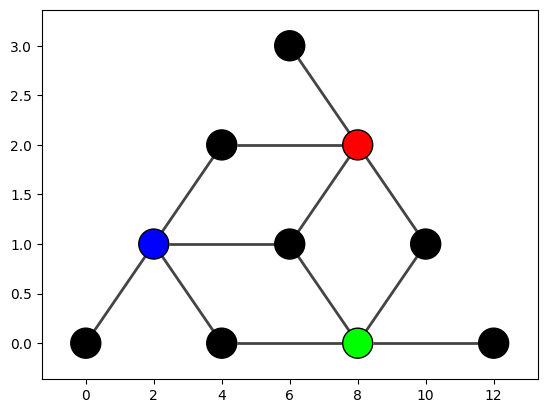

In [32]:
colorcode.draw_tanner_graph(show_axes=True)

In [16]:
from src.color_code_stim.color_code import ColorCode

cc = ColorCode(
    d=5, d2=7, rounds=3, shape="cult+growing", p_circuit=1e-3, comparative_decoding=True, decompose_dem=False
)

In [92]:
from src.color_code_stim.stim_utils import save_circuit_diagram

save_circuit_diagram(cc.circuit, "cult+growing.svg", type="timeline-svg")
# save_circuit_diagram(cc.circuit, "cult+growing.html", type="interactive")